# 模型选择

## 超参数与验证集

机器学习的超参数是指模型训练之前需要设置的参数，而不是通过训练数据学习得到的参数。超参数在模型训练前已经确定，并且不会在模型训练过程中自动调整。换句话说，超参数定义了学习算法的高级结构或行为。

以下是一些常见的超参数的例子：

1. **学习率**：在许多优化算法（如梯度下降）中使用，用于调整参数每次更新的步长。
2. **正则化系数**：如L1或L2正则化的强度。
3. **决策树的最大深度**：限制决策树的大小。
4. **随机森林中的树的数量**。
5. **神经网络中的层数和每层的神经元数量**。
6. **批大小**：用于批量训练的样本数量。

与此相对的是模型参数，它们是在模型训练过程中通过学习算法从数据中学习到的。例如，线性回归中的权重和偏差就是模型参数。

**验证集与超参数的关系**：
验证集在超参数调优中起到关键的作用。当我们有多组超参数选择时，我们不能直接使用测试集来选择最佳的超参数组合，因为这可能导致模型对测试集过拟合。为了避免这种情况，我们从原始训练数据中划分出一部分作为验证集。

调优过程如下：

1. 对于每组超参数选择，使用训练数据集（不包括验证集）训练模型。
2. 使用验证集评估模型的性能。
3. 选择在验证集上表现最好的超参数组合。
4. 使用选择的超参数组合和完整的训练数据集（包括验证集）再次训练模型。
5. 使用测试集进行最终的模型评估。

这种方法确保我们既不在训练数据上过拟合，也不在测试数据上过拟合，而是在一个独立的验证集上选择最佳的超参数。

## 训练集、验证集、测试集

训练集、验证集和测试集在机器学习项目中扮演着不同的角色：

1. **训练集 (Training Set)**:
    - **作用**：用于训练模型。模型参数在此数据集上进行调整以最小化某种损失函数。
    - **选择方法**：通常，数据的大部分（例如，70%或80%）都分配给训练集。

2. **验证集 (Validation Set)**:
    - **作用**：用于模型选择和超参数调整。例如，如果我们正在考虑使用不同的超参数组合或模型架构，我们可以根据它们在验证集上的性能进行选择。验证集帮助我们判断模型是否开始过拟合训练数据。
    - **选择方法**：验证集通常从原始训练数据中选取一部分（例如，从分配给训练的80%数据中取出10%，使训练集实际上只有70%）。

3. **测试集 (Test Set)**:
    - **作用**：在模型开发完成后，用于评估模型的最终性能。测试集为我们提供了一个关于模型在实际、未见过的数据上表现的无偏估计。测试数据不应在任何模型开发阶段使用，以确保我们有一个公正的评价。
    - **选择方法**：测试集通常包含原始数据的剩余部分（例如，20%）。

在从总数据集中选择这三个子集时，以下是一些建议：

- **随机分割**：确保数据在分割到训练、验证和测试集时是随机的。这可以确保数据的分布在各个子集中是相似的。

- **分层抽样**：在分类任务中，确保每个子集中各类的比例与总数据集中的比例相似。这尤其在类分布不平衡时很有用。

- **时间序列数据**：对于时间相关的数据，简单的随机分割可能不合适。在这种情况下，通常基于时间进行分割，确保训练集中的数据早于验证集，验证集的数据早于测试集。

- **使用交叉验证**：为了更好地利用有限的数据，可以使用交叉验证方法。例如，在k-折交叉验证中，数据被分成k个折叠。模型训练k次，每次使用k-1个折叠作为训练数据，剩下的一个折叠作为验证数据。

最后，选择这些子集的确切比例并不是固定的，而是根据具体项目和数据集的大小进行调整的。大型数据集可能只需要一个较小的测试集，而较小的数据集可能会从交叉验证中受益。

## 误差、偏差、方差、噪声

在机器学习中，误差的偏差-方差分解是一个用于理解模型误差来源的概念框架。模型的预测误差通常可以分解为三个主要组成部分：偏差、方差和不可减少的误差。

1. **偏差 (Bias)**：
    - 定义：偏差度量了模型预测的平均值与实际值之间的差异。如果一个模型对多个不同的训练集都系统性地做出相同的错误，那么这种模型被认为有高偏差。
    - 导致原因：通常是由于模型过于简单，无法捕获数据的真实模式和复杂性。
    - 例子：在非线性数据上使用线性回归模型。

2. **方差 (Variance)**：
    - 定义：方差衡量了对于不同的训练集，模型的预测的变化程度。如果模型对训练集的小变动非常敏感，并对不同的训练集做出大幅不同的预测，那么这种模型被认为有高方差。
    - 导致原因：通常是由于模型过于复杂，以至于它开始拟合训练数据中的噪声。
    - 例子：在少量数据上使用深度神经网络。

3. **不可减少的误差(噪声) (Irreducible Error)**：
    - 定义：这是与数据的固有噪声相关的误差部分，即使在理想条件下，也无法消除。
    - 导致原因：数据中的随机噪声或其他不可预测的因素。
    - 例子：收集数据时的仪器误差或非系统性误差。

偏差和方差之间的关系通常被描述为权衡（trade-off）：降低偏差往往会增加方差，反之亦然。这称为偏差-方差权衡。

### 二乘误差
 
$$
\begin{aligned}
    \langle [f(x_0)+\varepsilon-\hat{f}(x_0|D)]^2\rangle &= \langle \varepsilon^2\rangle + \langle [f(x_0)-\hat{f}(x_0|D)]^2\rangle + \langle[\hat{f}(x_0|D)-\langle\hat{f}(x_0|D)\rangle]^2\rangle- 2\langle \varepsilon[f(x_0)-\hat{f}(x_0|D)]\rangle \\
    &= \langle \varepsilon^2 \rangle+\mathrm{Bias}[f(x_0)] + \mathrm{Var}[f(x_0)]
\end{aligned}
$$

## 学习曲线

机器学习中的学习曲线是一种图形，它展示了模型在训练集和验证集（或交叉验证集）上的性能（通常是误差或准确度）随着训练样本数量的变化而变化。换句话说，学习曲线描述了当我们增加更多的训练数据时，模型的学习进展如何。

学习曲线通常有两条曲线：
1. **训练误差曲线**：展示了模型在不同大小的训练子集上的性能。
2. **验证误差曲线**：展示了模型对于不同大小的训练子集，在验证集上的性能。

学习曲线的意义和用途如下：

1. **判断模型是否过拟合或欠拟合**：
   - 如果训练误差很低，但验证误差很高，这可能意味着模型过拟合。
   - 如果两者的误差都很高，或两者的误差开始在高误差处收敛，这可能意味着模型欠拟合。

2. **数据量的需求**：
   - 如果验证误差仍然随着训练数据量的增加而下降，这可能意味着添加更多的训练数据可能会进一步提高模型的性能。
   - 如果验证误差在增加数据后稳定下来或者提前收敛，这意味着额外的数据可能不会带来显著的性能提升。

3. **调优指导**：
   - 学习曲线可以帮助我们决定是否需要增加模型的复杂性（例如，增加更多的特征或更多的神经网络层）或是否需要引入正则化来减少过拟合。

总的来说，学习曲线是机器学习中的一个重要工具，它为模型的评估和调优提供了有价值的直观信息。

好的，我们将进行以下步骤：

1. 使用`sklearn`的`datasets`模块生成一个简单的模拟数据集。
2. 使用三种不同复杂度的多项式回归模型来演示：欠拟合、正常拟合和过拟合。
3. 使用`sklearn`的`learning_curve`函数生成学习曲线数据。
4. 使用`matplotlib`绘制这些学习曲线。

首先，是代码部分：

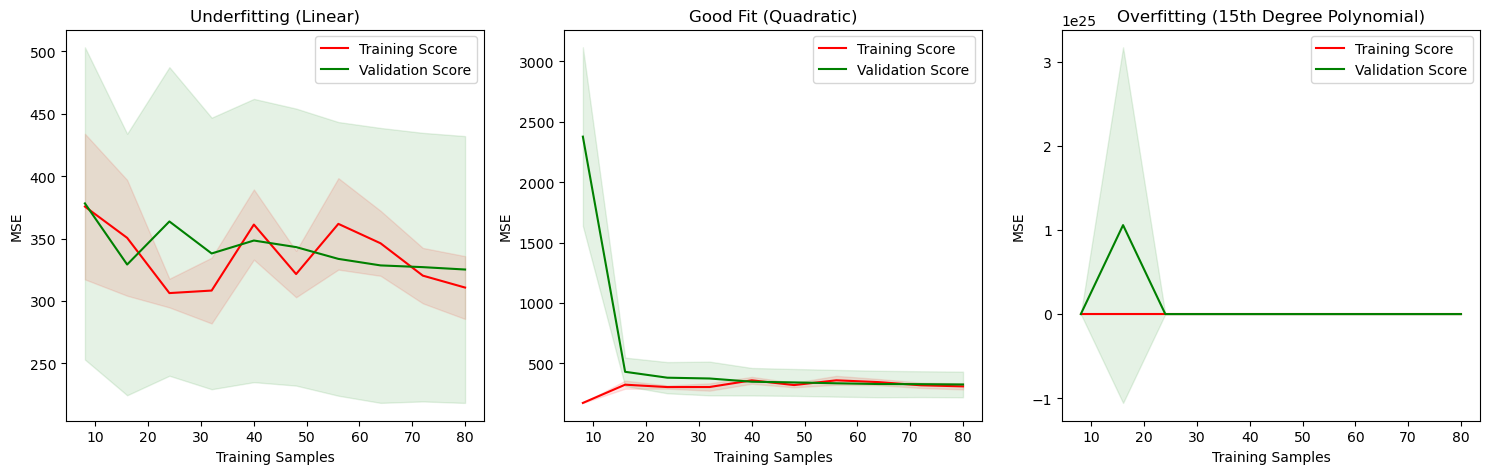

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# 生成模拟数据
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# 定义模型：欠拟合、正常拟合、过拟合
degrees = [1, 2, 15]
titles = ['Underfitting (Linear)', 'Good Fit (Quadratic)', 'Overfitting (15th Degree Polynomial)']

plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, 3, i+1)
    
    # 创建多项式模型
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # 获取学习曲线数据
    train_sizes, train_scores, valid_scores = learning_curve(polynomial_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')
    
    # 平均值和标准差
    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    valid_scores_mean = -valid_scores.mean(axis=1)
    valid_scores_std = valid_scores.std(axis=1)
    
    # 绘制学习曲线
    ax.plot(train_sizes, train_scores_mean, label='Training Score', color='r')
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    ax.plot(train_sizes, valid_scores_mean, label='Validation Score', color='g')
    ax.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
    
    ax.set_title(titles[i])
    ax.set_xlabel('Training Samples')
    ax.set_ylabel('MSE')
    ax.legend()

plt.tight_layout()
plt.show()

这个例子中，可以观察到：

- **欠拟合**：训练得分和验证得分都较高，两者之间的差距很小。
- **正常拟合**：训练得分和验证得分都相对较低，并且它们趋于接近。
- **过拟合**：训练得分很低，但验证得分较高，两者之间的差距较大。

上述代码将绘制出这三种情况下的学习曲线。

### 另一个实例

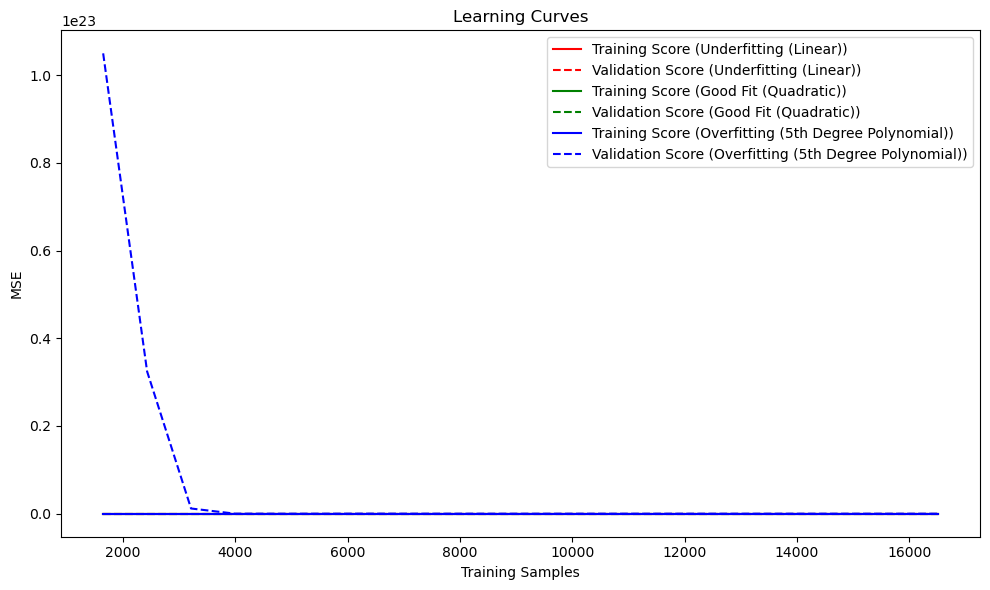

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 加载加利福尼亚房价数据集
data = fetch_california_housing()
X, y = data.data, data.target

# 使用StandardScaler进行特征标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 定义模型：欠拟合、正常拟合、过拟合
degrees = [1, 2, 5]  # 修改多项式的度，以更好地展示欠拟合、正常拟合和过拟合
titles = ['Underfitting (Linear)', 'Good Fit (Quadratic)', 'Overfitting (5th Degree Polynomial)']

plt.figure(figsize=(10, 6))

colors = ['r', 'g', 'b']

for i, degree in enumerate(degrees):
    # 创建多项式模型
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # 获取学习曲线数据
    train_sizes, train_scores, valid_scores = learning_curve(polynomial_model, X, y, train_sizes=np.linspace(0.1, 1.0, 20), cv=5, scoring='neg_mean_squared_error')
    
    # 平均值和标准差
    train_scores_mean = -train_scores.mean(axis=1)
    valid_scores_mean = -valid_scores.mean(axis=1)
    
    # 绘制学习曲线
    plt.plot(train_sizes, train_scores_mean, label=f'Training Score ({titles[i]})', color=colors[i])
    plt.plot(train_sizes, valid_scores_mean, label=f'Validation Score ({titles[i]})', linestyle='--', color=colors[i])

plt.title('Learning Curves')
plt.xlabel('Training Samples')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.show()


## K折交叉验证（K-Fold Cross-Validation）

K折交叉验证（K-Fold Cross-Validation）是一种评估模型性能的技术，它通过将原始数据集分割成K个子集来实现。在K次的训练和验证过程中，每个子集都会分别被用作验证集一次，而其余的K-1个子集组成的数据集被用作训练集。这样，我们可以得到K次的模型性能评估，然后对这K次的结果进行平均，从而得到一个更稳健的模型评估。

以下是K折交叉验证的步骤：

1. 将整个数据集随机分割为K个大小相等（或近似相等）的子集。
2. 对于每一个k = 1,2,...,K：
   - 使用k个子集作为验证集，其余的K-1个子集合并起来作为训练集。
   - 训练模型在这个训练集上。
   - 评估模型在这个验证集上的性能。
   - 记录性能指标（例如，准确率、MSE等）。
3. 计算K次性能指标的平均值，得到模型的总体评估。

K折交叉验证的主要优点是：

1. **更稳健的模型评估**：由于模型在K个不同的训练集上进行了训练和评估，因此我们可以得到一个关于模型性能的更稳定和可靠的估计。
2. **利用数据的高效性**：与单独的训练/验证分割相比，所有的数据都被用作了训练和验证，这在数据量有限的情况下尤其有价值。

然而，它的缺点是：

1. **计算成本更高**：模型需要被训练K次，而不是只训练一次。

常见的K值选择是5或10，但最佳的K值可能根据具体的数据集和问题而变化。另外，对于时间序列数据或数据有特定结构的情况，我们可能需要使用特定的分割策略，例如时间序列交叉验证。

### 交叉验证

以下是一个使用`sklearn`的例子，该例子展示了如何对一个简单的线性回归模型进行K折交叉验证。

首先，假设我们有一些模拟数据。我们将使用`sklearn`的`datasets`模块生成这些数据，然后使用`model_selection`模块中的`KFold`类进行交叉验证。

注意以下几点：
- 我们使用了`neg_mean_squared_error`作为评分标准，因为在`sklearn`中，评分函数通常是越大越好，所以为了转化MSE这种越小越好的指标，它使用了负值。
- 使用`shuffle=True`确保在进行K折分割之前数据已经被打乱，这是一个好的实践，特别是当数据的原始顺序可能有某种模式时。
- 最后，我们输出了每一折的性能和整体的平均性能。

这就是使用`sklearn`进行K折交叉验证的基本过程。您可以针对自己的数据和模型进行类似的操作。

In [1]:
# 导入所需的库
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# 生成模拟数据
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# 初始化线性回归模型
model = LinearRegression()

# 设置K折交叉验证
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# 进行交叉验证
scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

# 输出每折的性能
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: Mean Squared Error: {-score:.2f}")

# 输出总体平均性能
print(f"\nAverage MSE: {-scores.mean():.2f}")

Fold 1: Mean Squared Error: 0.01
Fold 2: Mean Squared Error: 0.01
Fold 3: Mean Squared Error: 0.01
Fold 4: Mean Squared Error: 0.01
Fold 5: Mean Squared Error: 0.01
Fold 6: Mean Squared Error: 0.01
Fold 7: Mean Squared Error: 0.01
Fold 8: Mean Squared Error: 0.01
Fold 9: Mean Squared Error: 0.01
Fold 10: Mean Squared Error: 0.01

Average MSE: 0.01


## 数据预处理

### 特征归一化

特征归一化是在预处理阶段调整特征的尺度的过程。这通常很有用，因为很多机器学习算法在处理尺度差异较大的特征时可能不会表现得很好。以下是两种常用的特征归一化方法：

1. **Min-Max 归一化 (Min-Max Scaling)**
   
   这种方法会对原始数据进行线性变换，确保结果值落在 `[0, 1]` 范围内。具体的转换公式如下：
   
   $$ X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} $$
   
   其中，$X_{norm}$ 是归一化后的值，$X$ 是原始值，而 $X_{min}$ 和 $X_{max}$ 分别是数据的最小值和最大值。
   
   当我们想要将数据归一化到任意两个数 $a$ 和 $b$ 之间时，公式可以调整为：
   
   $$ X_{norm} = a + \frac{(X - X_{min})(b - a)}{X_{max} - X_{min}} $$

2. **Z-score 归一化 (Standardization or Z-Score Normalization)**
   
   这种方法基于原始数据的均值（mean）和标准差（standard deviation）来进行归一化。转换后的数据的均值为0，标准差为1。具体的转换公式如下：
   
   $$ X_{standard} = \frac{X - \mu}{\sigma} $$
   
   其中，$X_{standard}$ 是标准化后的值，$X$ 是原始值，$\mu$ 是数据的均值，而 $\sigma$ 是数据的标准差。

### 为什么使用归一化？

- 很多算法都假设所有特征都在同样的尺度上。例如，在使用梯度下降法的算法中，如果特征尺度差异很大，可能需要很长时间才能收敛。
- 一些算法，如 K-近邻（K-NN），基于特征的距离进行操作，而不同的尺度会导致距离度量失效。
- 神经网络的输入层通常希望得到范围相近的输入特征，这有助于网络的权重更好地初始化并更快地收敛。

注意：虽然归一化有其优势，但并非所有的机器学习算法都需要归一化。例如，决策树和随机森林等基于树的算法不受特征尺度的影响。

### 举例

In [2]:
from sklearn.datasets import load_iris
import numpy as np

data = load_iris()
X = data.data[:10]

# Min-Max normalization
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_normalized = (X - X_min) / (X_max - X_min)
print(X_normalized)

[[0.7        0.6        0.25       0.33333333]
 [0.5        0.1        0.25       0.33333333]
 [0.3        0.3        0.         0.33333333]
 [0.2        0.2        0.5        0.33333333]
 [0.6        0.7        0.25       0.33333333]
 [1.         1.         1.         1.        ]
 [0.2        0.5        0.25       0.66666667]
 [0.6        0.5        0.5        0.33333333]
 [0.         0.         0.25       0.33333333]
 [0.5        0.2        0.5        0.        ]]


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized_sklearn = scaler.fit_transform(X)
print(X_normalized_sklearn)

[[0.7        0.6        0.25       0.33333333]
 [0.5        0.1        0.25       0.33333333]
 [0.3        0.3        0.         0.33333333]
 [0.2        0.2        0.5        0.33333333]
 [0.6        0.7        0.25       0.33333333]
 [1.         1.         1.         1.        ]
 [0.2        0.5        0.25       0.66666667]
 [0.6        0.5        0.5        0.33333333]
 [0.         0.         0.25       0.33333333]
 [0.5        0.2        0.5        0.        ]]


In [4]:
# Z-score normalization
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std
print(X_standardized)

[[ 0.86828953  0.65207831 -0.48795004 -0.26726124]
 [ 0.14471492 -1.06391725 -0.48795004 -0.26726124]
 [-0.57885968 -0.37751902 -1.46385011 -0.26726124]
 [-0.94064699 -0.72071813  0.48795004 -0.26726124]
 [ 0.50650222  0.99527742 -0.48795004 -0.26726124]
 [ 1.95365143  2.02487476  2.43975018  2.40535118]
 [-0.94064699  0.3088792  -0.48795004  1.06904497]
 [ 0.50650222  0.3088792   0.48795004 -0.26726124]
 [-1.66422159 -1.40711636 -0.48795004 -0.26726124]
 [ 0.14471492 -0.72071813  0.48795004 -1.60356745]]


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized_sklearn = scaler.fit_transform(X)
print(X_standardized_sklearn)

[[ 0.86828953  0.65207831 -0.48795004 -0.26726124]
 [ 0.14471492 -1.06391725 -0.48795004 -0.26726124]
 [-0.57885968 -0.37751902 -1.46385011 -0.26726124]
 [-0.94064699 -0.72071813  0.48795004 -0.26726124]
 [ 0.50650222  0.99527742 -0.48795004 -0.26726124]
 [ 1.95365143  2.02487476  2.43975018  2.40535118]
 [-0.94064699  0.3088792  -0.48795004  1.06904497]
 [ 0.50650222  0.3088792   0.48795004 -0.26726124]
 [-1.66422159 -1.40711636 -0.48795004 -0.26726124]
 [ 0.14471492 -0.72071813  0.48795004 -1.60356745]]


### 异常值检测

异常值检测，也被称为异常检测或离群点检测，是识别不符合预期模式或与大多数数据点明显不同的数据点的过程。这些异常值可能是由于测量误差、输入误差或真实的异常变动（例如欺诈行为）所引起的。在许多应用中，检测到这些异常是很重要的，因为它们可能表示对系统的攻击、故障或其他重要事件。

机器学习中的异常值检测的实现方法有很多，以下是一些常见的方法：

1. **基于统计的方法**:
   - 这些方法基于数据的统计分布来确定异常值。例如，对于正态分布的数据，任何位于平均值的3个标准差之外的数据点都可能被视为异常值。
   - 基于概率和统计模型的方法也可以用于异常检测，例如 Grubbs' 测试。

2. **基于近邻的方法 (如 k-NN)**:
   - k-最近邻 (k-NN) 方法用于确定一个数据点的异常程度。它是基于该数据点与其最近邻之间的距离来工作的。如果某个数据点的距离远远大于其他数据点，则可能认为该数据点是异常值。

3. **基于聚类的方法 (如 K-Means)**:
   - 使用聚类方法（如K-Means）将数据点分组为簇或群组，然后评估每个数据点与其分配的簇的相似度。那些与其分配的簇不太相似的数据点可能被视为异常。

4. **基于密度的方法 (如 DBSCAN)**:
   - 这些方法考虑了数据点的局部密度。在低密度区域中的数据点更有可能被视为异常。

5. **使用神经网络 (如自编码器)**:
   - 自编码器是一种特殊类型的神经网络，可以学习输入数据的压缩表示形式。在训练过程中，自编码器试图最小化重构误差（即输入和输出之间的差异）。对于异常数据，由于它们与大多数训练数据不同，所以重构误差可能会比较大。因此，可以使用重构误差作为异常分数。

6. **隔离森林 (Isolation Forest)**:
   - 隔离森林是一种基于树的方法，它随机选择特征并随机选择该特征的分割值，以递归地隔离样本。异常值通常是那些更容易被隔离的样本，因为它们与大部分样本都有很大的差异。因此，树中的路径长度可以用作异常分数。

上述方法的选择应该基于具体应用和数据的性质。此外，实际的异常检测通常涉及多个步骤，包括数据清理、特征工程、模型选择、模型训练和结果解释。

#### 实例

我们可以使用 `sklearn` 中的 `make_blobs` 函数来生成聚类数据，并在此基础上添加一些异常值来创建一个异常值检测的数据集。以下是如何做到这一点的方法：

1. 使用 `make_blobs` 生成几个数据集簇。
2. 手动添加一些随机数据点作为异常值。


在上述代码中，我们首先使用 `make_blobs` 生成了300个数据点，并添加了20个异常值。在可视化中，您可以看到正常的数据点和红色圆圈表示的异常值。

您可以使用此数据集 `X_with_anomalies` 进行异常检测。

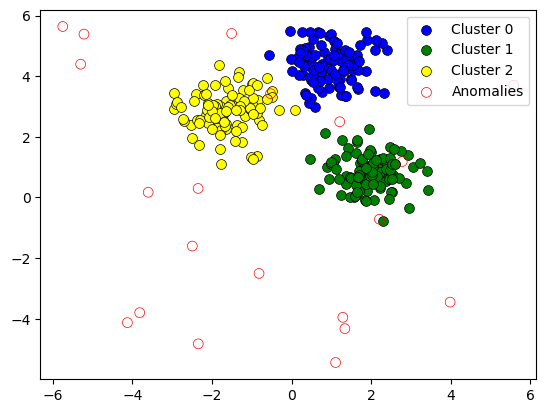

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 使用make_blobs生成3个簇的数据
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# 添加一些随机数据作为异常值
rng = np.random.RandomState(42)
anomalies = rng.uniform(low=-6, high=6, size=(20, 2))

# 将异常值和原始数据结合起来
X_with_anomalies = np.vstack([X, anomalies])
y_with_anomalies = np.concatenate([y, [-1]*20])  # 使用-1标记异常值

# 定义簇和异常值的颜色
colors = ['blue', 'green', 'yellow', 'red']

# 绘制数据集
for idx, color in enumerate(colors[:-1]):
    plt.scatter(X_with_anomalies[y_with_anomalies == idx, 0], X_with_anomalies[y_with_anomalies == idx, 1], 
                s=50, color=color, edgecolors='black', linewidth=0.5, label=f'Cluster {idx}')

# 特别标记异常值
plt.scatter(anomalies[:, 0], anomalies[:, 1], s=50, edgecolors='red', 
            linewidth=0.5, facecolors='none', label='Anomalies')

plt.legend()
plt.show()


In [7]:
def plot_results(X, y_true, y_pred, title):
    colors = ['blue', 'green', 'yellow', 'red']
    plt.figure(figsize=(8, 6))
    for idx, color in enumerate(colors[:-1]):
        mask = y_pred == idx
        plt.scatter(X[mask, 0], X[mask, 1], s=50, color=color, edgecolors='black', linewidth=0.5, label=f'Cluster {idx}')

    mask_anomalies = y_pred == -1
    plt.scatter(X[mask_anomalies, 0], X[mask_anomalies, 1], s=50, edgecolors='red', 
                linewidth=0.5, facecolors='none', label='Detected Anomalies')
    
    plt.title(title)
    plt.legend()
    plt.show()

def calculate_success_rate(y_true, y_pred):
    # 将非异常值标签设置为0，异常值为1
    y_true_binary = (y_true == -1).astype(int)
    y_pred_binary = (y_pred == -1).astype(int)
    accuracy = np.mean(y_true_binary == y_pred_binary)
    return accuracy

1. Grubbs' 测试：
   - Grubbs' 测试通常适用于单变量数据。由于我们的数据集是二维的，所以这不是最佳方法，但我们可以尝试。

In [8]:
from outliers import smirnov_grubbs as grubbs

# 对第一个特征应用Grubbs'测试
indices = grubbs.test(X_with_anomalies[:, 0], alpha=0.05)
y_pred_grubbs = np.array([-1 if i not in indices else 0 for i in range(X_with_anomalies.shape[0])])
plot_results(X_with_anomalies, y_with_anomalies, y_pred_grubbs, "Grubbs' Test")
print("Success rate with Grubbs' Test:", calculate_success_rate(y_with_anomalies, y_pred_grubbs))


ModuleNotFoundError: No module named 'outliers'

2. kNN

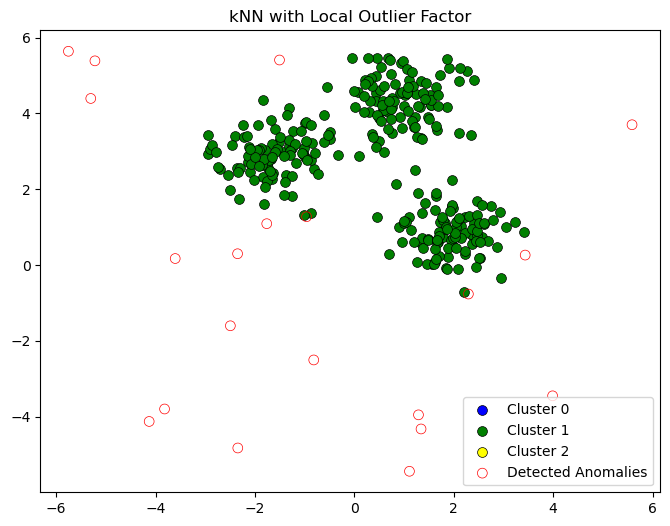

Success rate with kNN: 0.975


In [9]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.06)
y_pred_lof = lof.fit_predict(X_with_anomalies)
plot_results(X_with_anomalies, y_with_anomalies, y_pred_lof, "kNN with Local Outlier Factor")
print("Success rate with kNN:", calculate_success_rate(y_with_anomalies, y_pred_lof))

3. K-Means

c:\Users\11234\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\11234\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


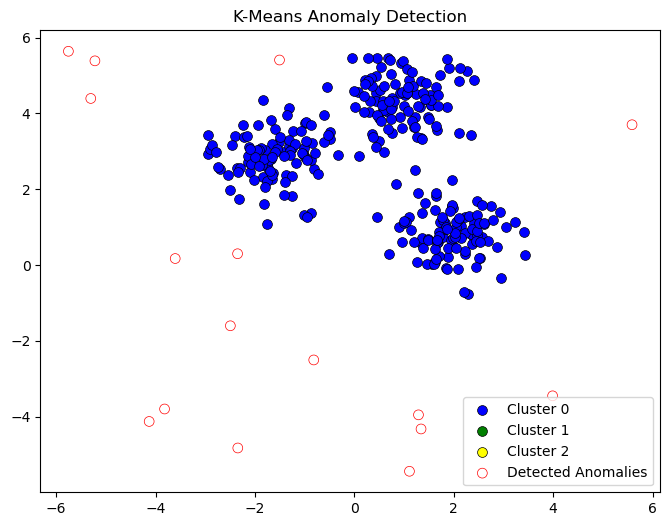

Success rate with K-Means: 0.9875


In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_with_anomalies)
distances = np.min(kmeans.transform(X_with_anomalies), axis=1)
threshold = np.percentile(distances, 95)  # 将距离最大的5%的点视为异常
y_pred_kmeans = np.where(distances > threshold, -1, 0)
plot_results(X_with_anomalies, y_with_anomalies, y_pred_kmeans, "K-Means Anomaly Detection")
print("Success rate with K-Means:", calculate_success_rate(y_with_anomalies, y_pred_kmeans))


4. DBSCAN
    - DBSCAN 也可以用于异常检测。在这种情况下，我们需要调整两个参数：`eps` 和 `min_samples`。`eps` 是一个距离阈值，用于确定两个数据点之间的距离是否足够小，以便将它们分为同一个簇。`min_samples` 是一个簇中的最小数据点数。如果一个簇中的数据点数小于 `min_samples`，则该簇将被视为异常。

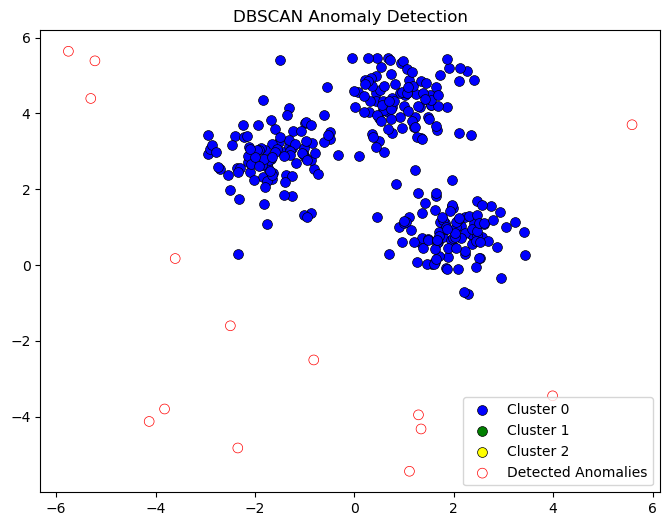

Success rate with DBSCAN: 0.98125


In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X_with_anomalies)
plot_results(X_with_anomalies, y_with_anomalies, y_pred_dbscan, "DBSCAN Anomaly Detection")
print("Success rate with DBSCAN:", calculate_success_rate(y_with_anomalies, y_pred_dbscan))

5. 隔离森林
    - 隔离森林是一种基于树的方法，它随机选择特征并随机选择该特征的分割值，以递归地隔离样本。异常值通常是那些更容易被隔离的样本，因为它们与大部分样本都有很大的差异。因此，树中的路径长度可以用作异常分数。

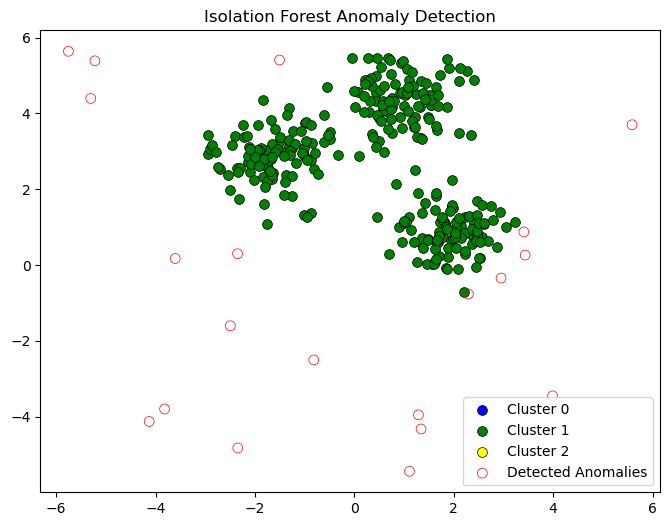

Success rate with Isolation Forest: 0.975


In [12]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.06, random_state=0)
y_pred_isoforest = iso_forest.fit_predict(X_with_anomalies)
plot_results(X_with_anomalies, y_with_anomalies, y_pred_isoforest, "Isolation Forest Anomaly Detection")
print("Success rate with Isolation Forest:", calculate_success_rate(y_with_anomalies, y_pred_isoforest))

## 混淆矩阵 (Confusion Matrix)

混淆矩阵（Confusion Matrix）是一种常见的工具，用于评估分类器的性能。对于二元分类问题，混淆矩阵通常是一个2x2的表格，用于显示实际类与预测类之间的对应关系。更具体地说，它描述了以下几个概念：

1. **True Positives (TP)**: 真正类被正确地预测为正类。
2. **True Negatives (TN)**: 真负类被正确地预测为负类。
3. **False Positives (FP)**: 真负类被错误地预测为正类。也称为“假阳性”或“Type I错误”。
4. **False Negatives (FN)**: 真正类被错误地预测为负类。也称为“假阴性”或“Type II错误”。

混淆矩阵如下所示：

```
           | Predicted: Yes  | Predicted: No
---------------------------------------------
Actual: Yes|       TP        |       FN
---------------------------------------------
Actual: No |       FP        |       TN
```

混淆矩阵的好处在于，除了简单地告诉我们分类器的正确率外，它还可以提供有关假阳性和假阴性的更多信息，这在很多应用中都是非常重要的。

现在，我们使用 `sklearn` 为一个分类问题生成和可视化混淆矩阵。

在这个示例中，我们首先生成了一个分类数据集，然后使用逻辑回归进行分类。接着，我们使用`confusion_matrix`函数计算混淆矩阵，并使用`ConfusionMatrixDisplay`类进行可视化。

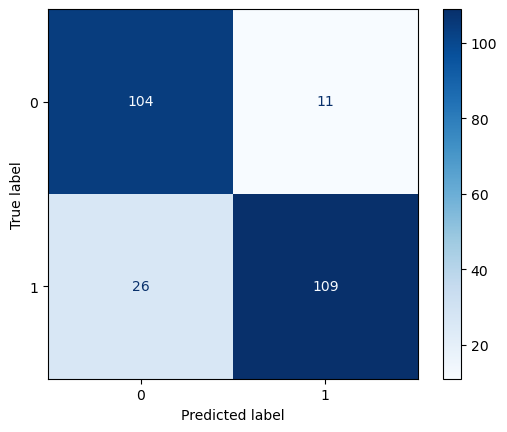

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 生成数据集
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 使用逻辑回归训练一个简单的分类器
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

在混淆矩阵的上下文中，以下是各个度量的定义和计算公式：

1. **准确率 (Accuracy)**: 这是所有正确预测的数据点与所有数据点的比值。
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

2. **精度 (Precision, 查准率)**: 是正确预测的正类与所有被预测为正类的数据点的比值。它告诉我们，在被模型预测为正类的样本中，有多少比例是真正的正类。
$$ \text{Precision} = \frac{TP}{TP + FP} $$

3. **召回率 (Recall, 查全率)**: 是正确预测的正类与所有真正类的数据点的比值。它告诉我们，在所有真正的正类样本中，有多少比例被模型正确地预测出来。
$$ \text{Recall} = \frac{TP}{TP + FN} $$

4. **特异性 (Specificity)**: 是正确预测的负类与所有真负类的数据点的比值。它告诉我们，在所有真正的负类样本中，有多少比例被模型正确地预测出来。
$$ \text{Specificity} = \frac{TN}{TN + FP} $$

现在，结合之前的示例，我们可以使用`sklearn`的函数来计算这些度量：

这些度量为您提供了对模型性能的多方面的评估，可以帮助您确定模型在不同方面的强弱点。

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 计算度量
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])  # 注意：这里我们直接使用了上面的混淆矩阵

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

Accuracy: 0.8520
Precision: 0.9083
Recall: 0.8074
Specificity: 0.9083


## 数据的平衡性

在机器学习中，数据的平衡性通常指的是各个类别的数据样本数量的均衡。更具体地说，对于分类任务，如果每个类别的数据样本数量相近或相等，那么我们就说数据是平衡的；如果某个类别的数据样本数量远大于其他类别，那么数据就是不平衡的。

为什么数据平衡性重要？

1. **模型偏见**：不平衡的数据集可能会导致模型对数量较多的类别产生偏见。这是因为大多数机器学习算法旨在最大化整体的准确性，因此它们可能会偏向于大类，从而在小类上表现得不够好。

2. **评估误导**：在高度不平衡的数据集上，即使模型只预测主要类别，也可以获得很高的准确性。例如，在一个有95%的正类和5%的负类的数据集上，一个总是预测为正类的简单模型也可以获得95%的准确性。

3. **实际应用中的影响**：在某些应用中，少数类可能比大多数类更为重要。例如，在欺诈检测中，欺诈类（少数类）可能比非欺诈类更重要。

如何处理不平衡数据？

1. **重新采样**：
   - **过采样**：增加少数类的样本。这可以通过复制少数类样本或生成合成样本来实现。
   - **欠采样**：减少多数类的样本。这意味着随机删除某些多数类的样本，使数据平衡。

2. **使用合成数据生成方法**：例如SMOTE（合成少数类过采样技术）可以用于生成合成的少数类样本。

3. **使用不同的性能指标**：使用像F1分数、召回率、精确率或ROC-AUC这样的指标，而不是仅仅使用准确性。

4. **使用集成方法**：某些集成方法，如随机森林，可以处理不平衡数据，因为它们为每个子模型提供数据子集。

5. **考虑使用代价敏感的学习**：在这种方法中，对不同的类别分配不同的代价或权重。

6. **尝试不同的算法**：某些算法对不平衡数据可能更为鲁棒。例如，树形算法比线性模型在处理不平衡数据时通常表现得更好。

总的来说，数据平衡性是机器学习中分类任务的一个关键问题。处理不平衡数据需要策略性的方法，以确保模型不仅在训练数据上表现得很好，而且在实际应用中也能产生可靠的预测。

ROC曲线（Receiver Operating Characteristic curve）和AUC指标（Area Under the Curve）是评估分类模型性能的常用工具，特别是在二分类问题中。

### ROC曲线

ROC曲线描述了当阈值改变时，真正率（True Positive Rate, TPR）和假正率（False Positive Rate, FPR）之间的关系。这是一个二维图，其中：

- x轴表示FPR，计算公式为：
$$ \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} $$
- y轴表示TPR，计算公式为：$$ \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$

在ROC曲线中，随着阈值从1减小到0移动，每个点都表示在该阈值上的FPR和TPR。

### AUC指标

AUC表示ROC曲线下的面积。它提供了一个单一的值来度量模型的整体性能。AUC的值介于0和1之间。一个完美分类器的AUC值为1，而一个随机猜测的分类器的AUC值为0.5。

AUC有以下优点：

1. AUC对选择的阈值不敏感，因为它考虑了所有可能的阈值。
2. 当真正的类别分布改变（例如，非常不平衡的类别）时，AUC的性能不会发生太大的变化。

### 示例

考虑一个分类问题，我们希望预测一个给定的样本是否是正类。模型为每个样本提供一个概率得分，然后我们可以选择一个阈值来分类这些样本。

为了绘制ROC曲线，我们可以为每个可能的阈值计算TPR和FPR，然后在图上绘制它们。

### 注意：

ROC和AUC适用于任何可以提供概率得分的分类器，不仅仅是二分类问题。对于多类分类问题，可以为每个类别分别绘制ROC曲线。

总的来说，ROC和AUC提供了一个强大的框架来评估分类模型的性能，特别是当正负类别的数量不平衡或预测概率的阈值需要调整时。

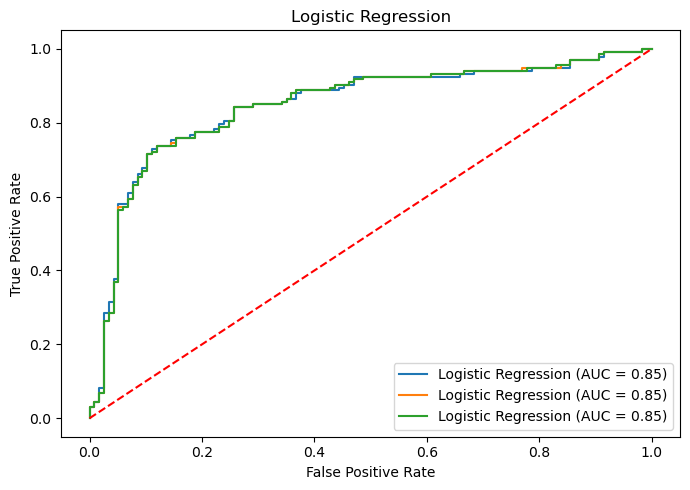

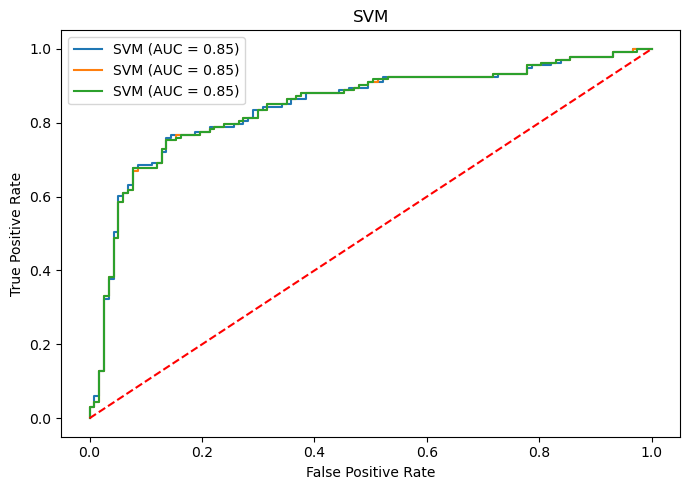

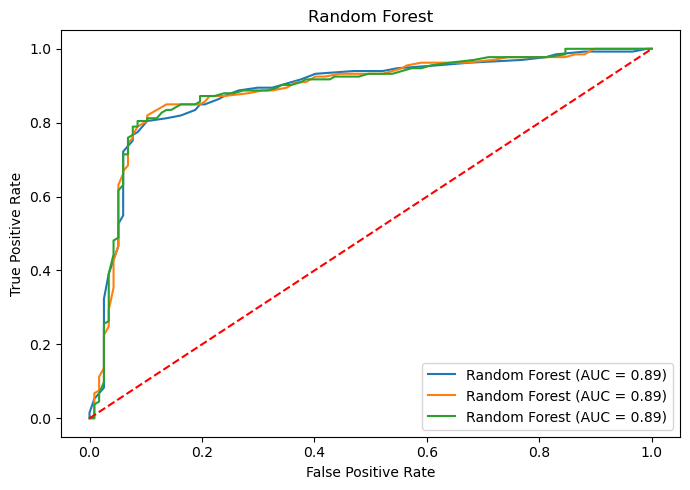

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# 1. 生成数据
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, n_clusters_per_class=1, weights=[0.5, 0.5], flip_y=0.3, random_state=42)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 2. 定义模型和参数
classifiers = {
    'Logistic Regression': [LogisticRegression(max_iter=1000, C=param, random_state=42) for param in [0.1, 1, 10]],
    'SVM': [SVC(probability=True, kernel='linear', C=param, random_state=42) for param in [0.1, 1, 10]],
    'Random Forest': [RandomForestClassifier(n_estimators=param, random_state=42) for param in [50, 100, 150]]
}

# 3. 为每种分类器训练模型，计算ROC和AUC，然后绘图
for idx, (name, models) in enumerate(classifiers.items()):
    plt.figure(figsize=(7, 5))
    
    for model in models:
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.legend()
    plt.tight_layout()
    plt.show()
